In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
hotel_bookings = pd.read_csv("hotel_bookings.csv") #reading dataset in
hotel_bookings

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0.0,342.0,2015.0,July,27.0,1.0,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,01/07/2015
1,Resort Hotel,0.0,737.0,2015.0,July,27.0,1.0,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,01/07/2015
2,Resort Hotel,0.0,7.0,2015.0,July,27.0,1.0,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,02/07/2015
3,Resort Hotel,0.0,13.0,2015.0,July,27.0,1.0,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,02/07/2015
4,Resort Hotel,0.0,14.0,2015.0,July,27.0,1.0,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,03/07/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119389,City Hotel,0.0,23.0,2017.0,August,35.0,30.0,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,06/09/2017
119390,City Hotel,0.0,102.0,2017.0,August,35.0,31.0,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,07/09/2017
119391,City Hotel,0.0,34.0,2017.0,August,35.0,31.0,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,07/09/2017
119392,City Hotel,0.0,109.0,2017.0,August,35.0,31.0,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,07/09/2017


In [3]:
statuses = hotel_bookings["reservation_status"].tolist()
set(statuses) # Checking levels : {'Canceled', 'Check-Out', 'No-Show'}

hotel_bookings = hotel_bookings.dropna(subset = 'lead_time') #dropping Not a Number values from lead_time column

canceled = hotel_bookings.loc[hotel_bookings["reservation_status"] == 'Canceled'] #Separating data by reservation status
check_out = hotel_bookings.loc[hotel_bookings["reservation_status"] == 'Check-Out']
no_show = hotel_bookings.loc[hotel_bookings["reservation_status"] == 'No-Show']

In [4]:
lead_time_canceled = sum(canceled['lead_time']) / len(canceled) #creating average values separated by reservation status
lead_time_check_out = sum(check_out['lead_time']) / len(check_out)
lead_time_no_show = sum(no_show['lead_time']) / len(no_show)

print(len(canceled)) #identifying how many reservations per status
print(len(check_out))
print(len(no_show))

print(lead_time_canceled) #printing values of average lead times by reservation status
print(lead_time_check_out)
print(lead_time_no_show)

#Making descriptives table for reference
full_descriptives = {
    "Reservation Status": ["Canceled", "Check-Out (Fulfilled)", "No-Show", "Total"],
    "Percentage of Total Reservations": ["36%", "63%", "1%", "100%"],
    "Number of Reservations": [43020, 75166, 1207, 119393],
    "Number of Days Booked in Advance (Mean)": [147.30, 79.99, 57.18, 94.82]
}

descriptives_df = pd.DataFrame(full_descriptives) 



43020
75166
1207
147.30330079033007
79.98513955777878
57.182270091135045


In [5]:
descriptives_df

,Reservation Status,Percentage of Total Reservations,Number of Reservations,Number of Days Booked in Advance (Mean)
0,Canceled,36%,43020,147.30
1,Check-Out (Fulfilled),63%,75166,79.99
2,No-Show,1%,1207,57.18
3,Total,100%,119393,94.82


In [6]:
#Examining the likelihood of customers who book with little - no advance (under 48 hours) warning to fulfill their reservations

#little - no advance warning operationalised as between 0-2 days in advance, referenced as "restricted" or "rest"
total_rest_lead_time = hotel_bookings.loc[hotel_bookings['lead_time'] <= 2] #pulling restricted results
total_rest_lead_time

total_rest_canceled = total_rest_lead_time.loc[total_rest_lead_time['reservation_status'] == 'Canceled']
total_rest_check_out = total_rest_lead_time.loc[total_rest_lead_time['reservation_status'] == 'Check-Out']
total_rest_no_show = total_rest_lead_time.loc[total_rest_lead_time['reservation_status'] == 'No-Show']

len(total_rest_canceled) #724
len(total_rest_check_out) #10909
len(total_rest_no_show) #240

rest_descriptives = {
    "Reservation Status": ["Canceled", "Check-Out (Fulfilled)", "No-Show", "Total"],
    "Percentage of Total Reservations": ["6%", "91%", "3%", "100%"],
    "Number of Reservations": [724, 10909, 240, 11873]
}

rest_descriptives_df = pd.DataFrame(rest_descriptives) 

In [7]:
rest_descriptives_df

,Reservation Status,Percentage of Total Reservations,Number of Reservations
0,Canceled,6%,724
1,Check-Out (Fulfilled),91%,10909
2,No-Show,3%,240
3,Total,100%,11873


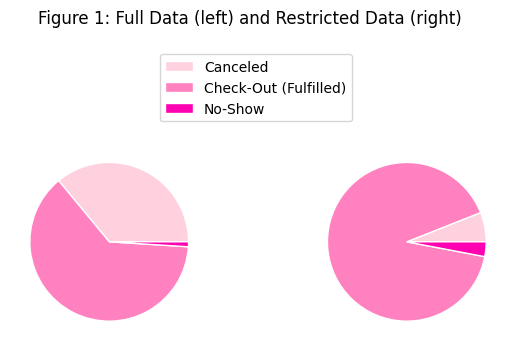

In [8]:
#Making pie charts for visualisation
full_percents = [36, 63, 1] #Repeating percentages already calculated in above code
rest_percents = [6, 91, 3]
labels = ["Canceled", "Check-Out (Fulfilled)", "No-Show"]
colors = ["xkcd:light pink", "xkcd:pink", "xkcd:bright pink"]

pie_charts, (ax1, ax2) = plt.subplots(1, 2)
pie_charts.suptitle('Figure 1: Full Data (left) and Restricted Data (right)')
ax1.pie(full_percents, colors=colors, radius=1, center=(4, 4),
       wedgeprops={"linewidth": 1, "edgecolor": "white"}, frame=False)
ax2.pie(rest_percents, colors=colors, radius=1, center=(4, 4),
       wedgeprops={"linewidth":1, "edgecolor": "white"}, frame = False)
pie_charts.legend(labels=labels, bbox_to_anchor=(0.67, 0.9))
plt.subplots_adjust(hspace = 0.2, wspace = 0.5)

## Mini-report

The business question I investigated was if hotels should restrict when customers can make their bookings, particularly on a last-minute basis. Businesses might be interested in this information to establish the most ideal time frame to allow customers to make reservations that would minimise the possibility of a cancellation or a no-show, hopefully decreasing profit loss.

For the purposes of this study, I focused only on the columns titled, "reservation_status," and "lead_time," returning the three types of reservation statuses— "Canceled," "Check-Out" (meaning a reservation that was fulfilled), and "No-Show"— and days between booking and reservation. I then separated the data further, creating a new data frame that only considered reservations made less than 2 days in advance and referred to it as “restricted”. Figure 1 shows pie charts of percentages of each level of reservation status for both the full dataset and the restricted dataset.

The findings suggest that customers who book within two days of their reservation are less likely to cancel or be no-shows than all customers in the overall data set, demonstrating that businesses should not put a lower cap on bookings. In fact, it seemed that customers were more likely to cancel if they booked far in advance (mean lead time of all cancellations was 147 days) which could be investigated in future research.


Overall mark: 60

#### Business Question:
A relevant business question is identified, though the question itself is relatively straightforward. The significance of answering the question is explained. Basic evidence is presented to derive findings and limitations, yet the analysis is quite simple overall. It can be naturally expected that shorter lead-time leads to lower cancel rate, hence the logic of the question needs to be revised.

<u>Good</u>

#### Data:
Two key variables, 'reservation_status' and 'lead_time' are effectively identified to answer the proposed question. The variables are explained, but the rationale of choosing them is not explicitly addressed (this is partly because that the question is straightforward). Improvements could inlcude employing more variables to make the data analysis more comprehensive. Appropriate data filtering and variable transformation are used, showing baisc understanding of data manipulation.

<u>Good</u>

#### Visualization:
A basic pie chart is used for the visualization purpose, but with limited explanatory elements. Consider to display the percentage for each partion and provide some annotations. How the full data (left) and the restricted data (right) are distinct seems not straightforward enough and hence needs to be explained.

<u>Good</u>

#### Code:
The code is clean well-organized overall. There are no errors in the code. Though the coding technique is basic, the script offers good readability. Comments are also provided along with the code.

<u>Very Good</u>
